In [37]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

def f(x) :
    #return pow(x[0],2) + pow(x[1],2)
    #return np.log(x[0]+x[1])*np.sin(x[0])
    #return np.exp(pow(x[0],2) + x[0]*x[1])
    #return 1/(x[0]+2*x[1]+4)
    #return np.sqrt(x[0]+2*x[1]+4)
    #return pow((1+x[0]), x[1])
    return np.exp(x[0])+x[1]

def P(a,x) :
    return a[0] + a[1]*x[1] + a[2]*x[1]*x[1]+ a[3]*x[0] + a[4]*x[0]*x[1] + a[5]*x[0]*x[0] #Degree 2, 2 X
    #return a[0] + a[1]*x[1] + a[2]*x[1]*x[1]+ a[3]*x[1]*x[1]*x[1] + a[4]*x[0] + a[5]*x[0]*x[1] + a[6]*x[0]*x[1]*x[1] + a[7]*x[0]*x[0] + a[8]*x[0]*x[0]*x[1] + a[9]*x[0]*x[0]*x[0]
nbTurn = 15
i=0

def makesGraph(i) : 
    M = np.loadtxt('../data/'+str(i)+'data.txt')
    points = np.loadtxt('../data/'+str(i)+'points.txt')
    if(len(points.shape) == 1) :
            points = [points]
    a = M[0]
    ax = plt.figure().add_subplot(projection='3d')
    x1 = np.linspace(M[1][0], M[1][1], 300)
    x2 = np.linspace(M[1][2], M[1][3],  300)
    X = np.meshgrid(x1, x2)
    e = f(X) - P(a,X)
    if(len(points)>0) :
        for i in points :
            plt.plot(i[0], i[1], f(i)-P(a,i), 'ro')
    ax.plot_surface(X[0], X[1], e, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
    ax.contourf(X[0], X[1], e, zdir='z', offset=-100, cmap='coolwarm')
    ax.contourf(X[0], X[1], e, zdir='x', offset=-40, cmap='coolwarm')
    ax.contourf(X[0], X[1], e, zdir='y', offset=40, cmap='coolwarm')
    #ax.set(xlim=(0,1), ylim=(0, 1), zlim=(0, 1.5), xlabel='X', ylabel='Y', zlabel='Z')
    
    plt.show()
    
def level_line(i) :
    M = np.loadtxt('../data/'+str(i)+'data.txt')
    points = np.loadtxt('../data/'+str(i)+'points.txt')
    if(len(points.shape) == 1) :
            points = [points]
    if(type(points) is list) :
        points = [points]
    a = M[0]
    borners = M[1]
    x1 = np.linspace(M[1][0], M[1][1], 300)
    x2 = np.linspace(M[1][2], M[1][3],  300)
    X = np.meshgrid(x1,x2)
    levels = f(X)-P(a,X)
    c = plt.contour(X[0],X[1],levels,50)
    if(len(points)>0) :
        for i in points :
            plt.plot(i[0], i[1], 'ro')
    plt.colorbar()
    plt.show()

In [42]:
from matplotlib.animation import FuncAnimation

frames = 3
for i in range(frames):
    for j in range(5) :
        M = np.loadtxt('../data/'+str(i+1)+'data.txt')
        points = np.loadtxt('../data/'+str(i+1)+'points.txt')
        if(len(points.shape) == 1) :
            points = [points]
        a = M[0]
        borners = M[1]
        x1 = np.linspace(M[1][0], M[1][1], 300)
        x2 = np.linspace(M[1][2], M[1][3],  300)
        X = np.meshgrid(x1,x2)
        levels = f(X)-P(a,X)
        c = plt.contour(X[0],X[1],levels,50)
        if(len(points[0])>0) :
            for p in points :
                plt.plot(p[0], p[1], 'ro')
        plt.colorbar()
        plt.savefig(f"LL{i}_{j}.png")
        plt.close()
from PIL import Image
images = [Image.open(f"LL{n+1}_{j}.png") for n in range(frames-1) for j in range(5)]
images[0].save('approxLL.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

In [43]:
frames = 3
for i in range(frames):
    for j in range(5) :
        M = np.loadtxt('../data/'+str(i+1)+'data.txt')
        points = np.loadtxt('../data/'+str(i+1)+'points.txt')
        if(len(points.shape) == 1) :
            points = [points]
        a = M[0]
        ax = plt.figure().add_subplot(projection='3d')
        x1 = np.linspace(M[1][0], M[1][1], 300)
        x2 = np.linspace(M[1][2], M[1][3],  300)
        X = np.meshgrid(x1, x2)
        e = f(X) - P(a,X)
        ax.plot_surface(X[0], X[1], e, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
        ax.contourf(X[0], X[1], e, zdir='z', offset=-100, cmap='coolwarm')
        ax.contourf(X[0], X[1], e, zdir='x', offset=-40, cmap='coolwarm')
        ax.contourf(X[0], X[1], e, zdir='y', offset=40, cmap='coolwarm')
        if(len(points[0])>0) :
            for p in points :
                plt.plot(p[0], p[1], f(p)-P(a,p), 'ro')
        plt.savefig(f"{i}_{j}.png")
        plt.close()
from PIL import Image
images = [Image.open(f"{n+1}_{j}.png") for n in range(frames-1) for j in range(5)]
images[0].save('approx.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

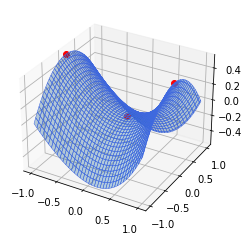

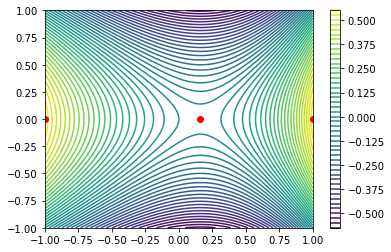

In [38]:
i = 1
makesGraph(i)
level_line(i)

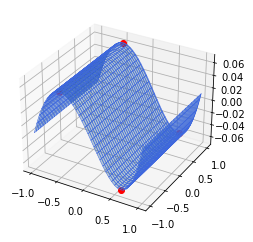

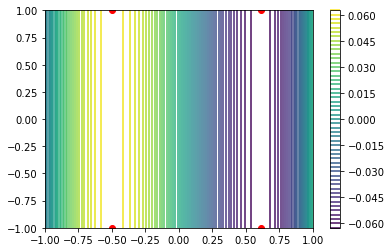

In [39]:
i = 2
makesGraph(i)
level_line(i)

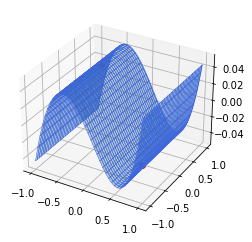

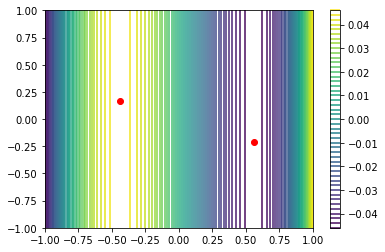

In [40]:
i = 3
makesGraph(i)
level_line(i)

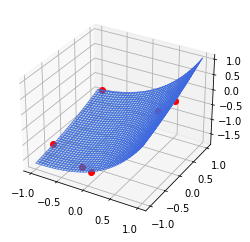

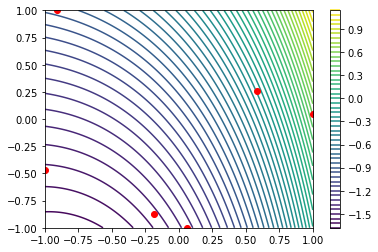

In [41]:
i = 4
makesGraph(i)
level_line(i)

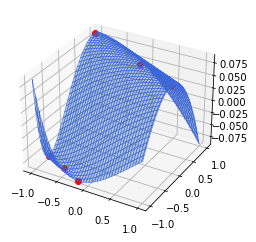

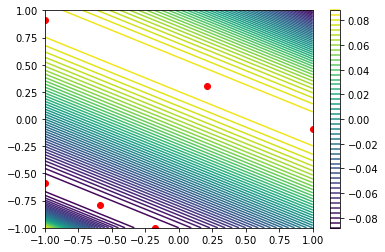

In [20]:
i = 5
makesGraph(i)
level_line(i)

/tmp/ipykernel_9574/1231066704.py:21: UserWarning: loadtxt: input contained no data: "../data/6points.txt"
  points = np.loadtxt('../data/'+str(i)+'points.txt')


IndexError: index 0 is out of bounds for axis 0 with size 0

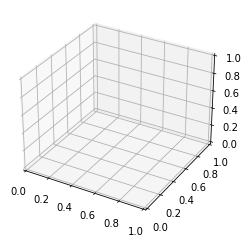

In [18]:
i = 6
makesGraph(i)
level_line(i)

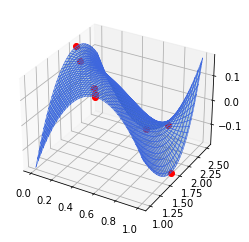

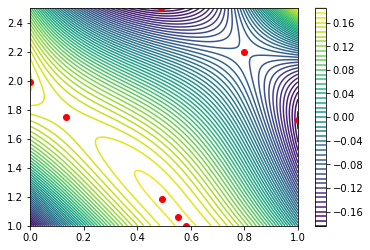

In [23]:
i = 7
makesGraph(i)
level_line(i)

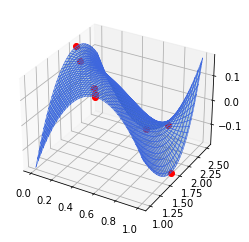

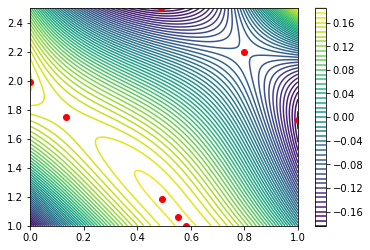

In [24]:
i = 8
makesGraph(i)
level_line(i)

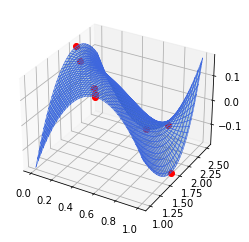

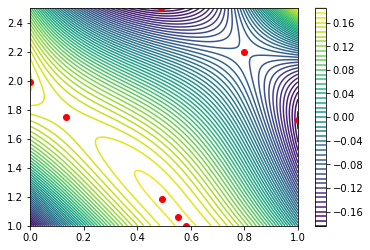

In [25]:
i = 9
makesGraph(i)
level_line(i)

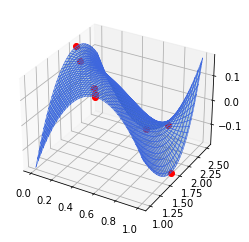

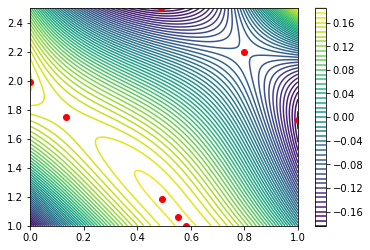

In [26]:
i = 10
makesGraph(i)
level_line(i)

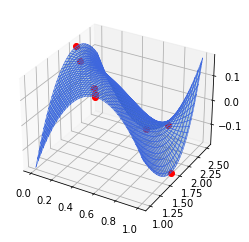

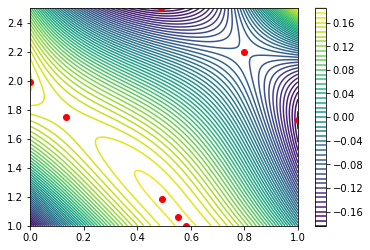

In [27]:
i = 11
makesGraph(i)
level_line(i)

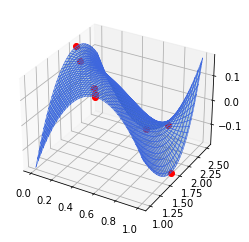

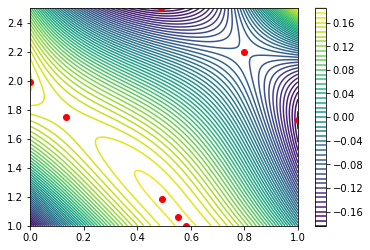

In [28]:
i = 12
makesGraph(i)
level_line(i)

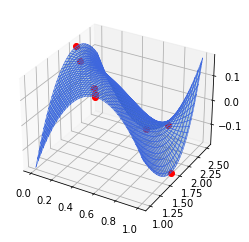

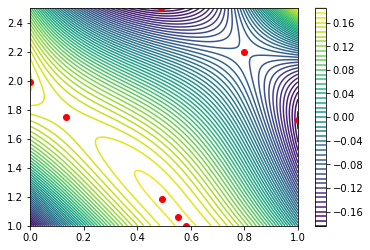

In [29]:
i = 13
makesGraph(i)
level_line(i)

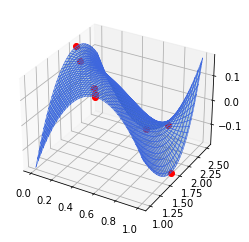

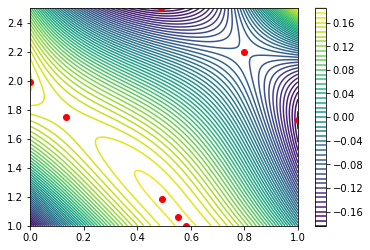

In [30]:
i = 14
makesGraph(i)
level_line(i)

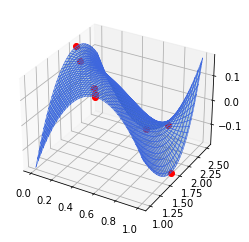

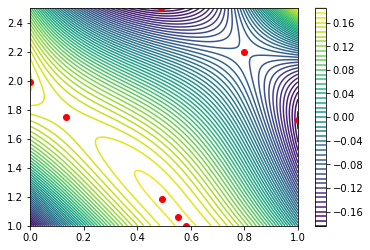

In [31]:
i = 15
makesGraph(i)
level_line(i)

In [32]:
i = 16
makesGraph()
level_line()

TypeError: makesGraph() missing 1 required positional argument: 'i'

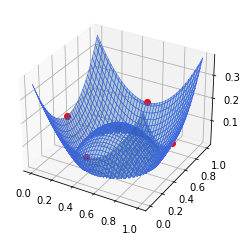

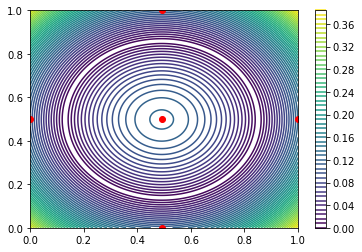

In [55]:
i = 17
makesGraph()
level_line()

/tmp/ipykernel_34065/959451585.py:21: UserWarning: loadtxt: input contained no data: "../data/18points.txt"
  points = np.loadtxt('../data/'+str(i)+'points.txt')


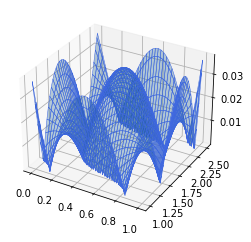

/tmp/ipykernel_34065/959451585.py:42: UserWarning: loadtxt: input contained no data: "../data/18points.txt"
  points = np.loadtxt('../data/'+str(i)+'points.txt')


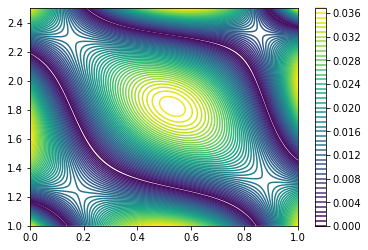

In [199]:
i = 18
makesGraph(i)
level_line(i)

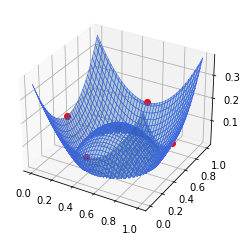

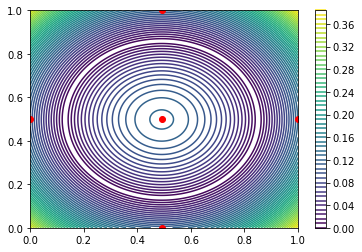

In [57]:
i = 19
makesGraph()
level_line()

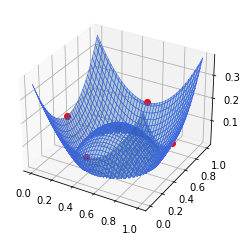

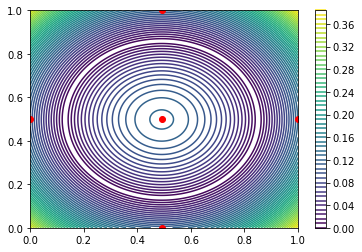

In [58]:
i = 20
makesGraph()
level_line()

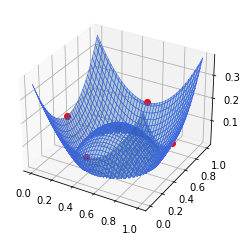

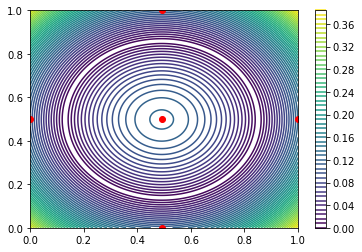

In [59]:
i = 21
makesGraph()
level_line()

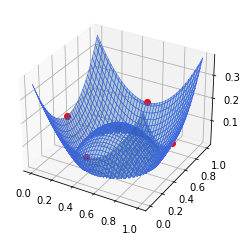

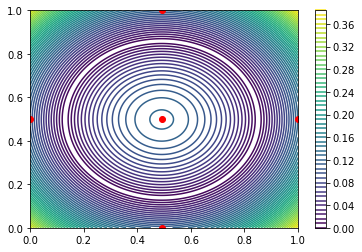

In [60]:
i = 22
makesGraph()
level_line()

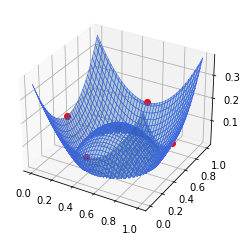

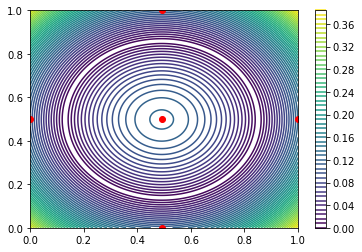

In [61]:
i = 23
makesGraph()
level_line()

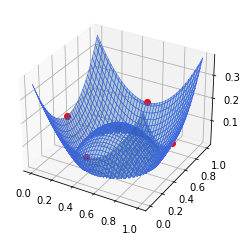

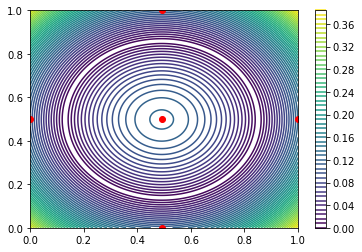

In [62]:
i = 24
makesGraph()
level_line()

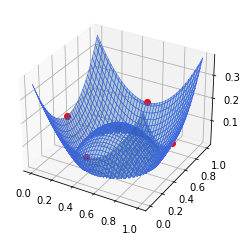

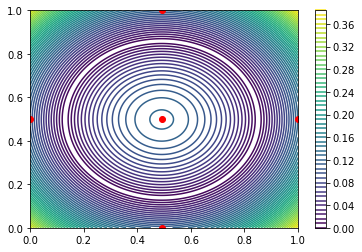

In [63]:
i = 25
makesGraph()
level_line()

### Random Points 5

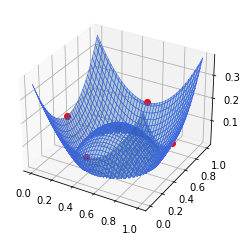

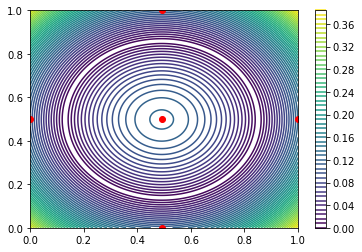

In [2]:
makesGraph()
level_line()

### Random Points 10

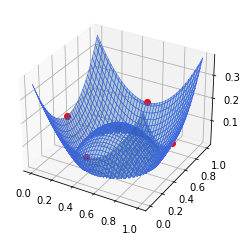

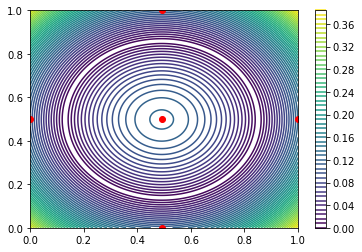

In [3]:
makesGraph()
level_line()

### Random Points 100

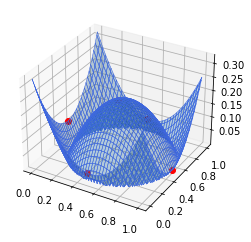

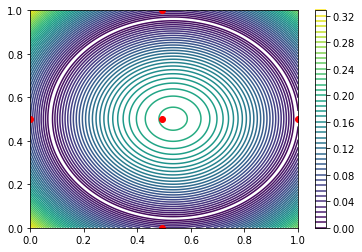

In [6]:
makesGraph()
level_line()

### Random Points 1000

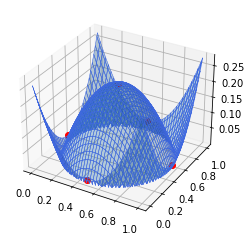

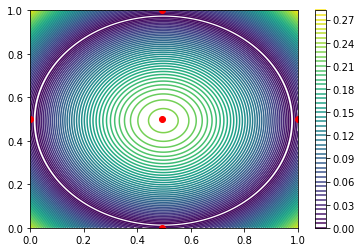

In [7]:
makesGraph()
level_line()

### Step 0 side and center

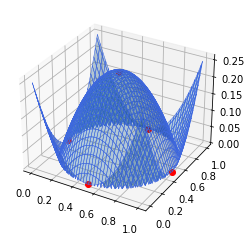

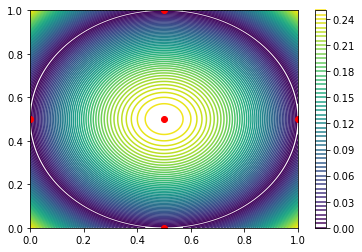

In [49]:
makesGraph()
level_line()

In [ ]:
from matplotlib.patches import Rectangle
M = np.loadtxt('../data/extremas.txt')
N = np.loadtxt('../data/'+str(i)+'data.txt')